In [2]:
%pylab inline
import pandas
import seaborn


Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory


data = pandas.read_csv('Desktop/uber-raw-data-apr14.csv')

In [4]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


# Convert datetime and add some useful columns

In [5]:
dt = '4/1/2014 0:11:00'

In [7]:
dt = pandas.to_datetime(dt)

In [8]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [9]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [10]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [16]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

# analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM = uber = Apr 2014')

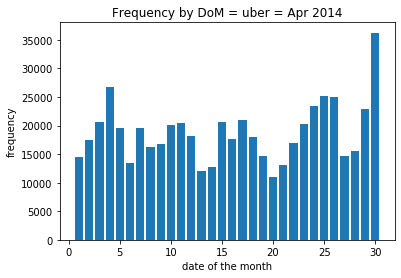

In [27]:
hist(data.dom, bins=30, rwidth=0.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM = uber = Apr 2014')

In [28]:
for k, rows in data.groupby('dom'):
    print((k, len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [30]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

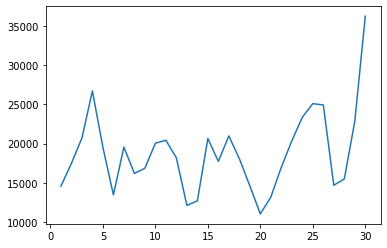

In [31]:
plot(by_date)

# analyze the hour

(array([    0.,     0.,     0.,     0., 19679.,  4935.,  5040.,  6095.,
         9476., 43422., 22843., 17939., 17865., 18774., 42028., 27190.,
        35324., 42003., 45475., 81926., 36244., 36964., 30645., 20649.]),
 array([-5.        , -3.79166667, -2.58333333, -1.375     , -0.16666667,
         1.04166667,  2.25      ,  3.45833333,  4.66666667,  5.875     ,
         7.08333333,  8.29166667,  9.5       , 10.70833333, 11.91666667,
        13.125     , 14.33333333, 15.54166667, 16.75      , 17.95833333,
        19.16666667, 20.375     , 21.58333333, 22.79166667, 24.        ]),
 <a list of 24 Patch objects>)

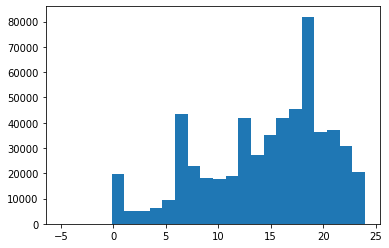

In [32]:
hist(data.hour, bins=24, range=(-5, 24))

# analyze the weekday

([<matplotlib.axis.XTick at 0x232ed696a88>,
 <a list of 7 Text xticklabel objects>)

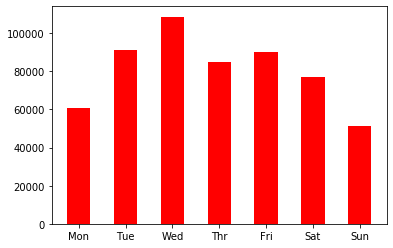

In [35]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=.5, color='red')
xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())

# cross analysis(hour, dow)

In [40]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

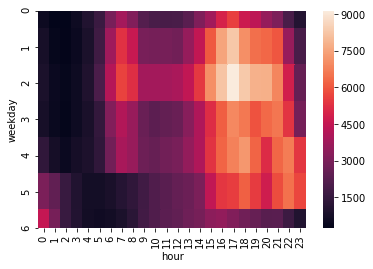

In [42]:
seaborn.heatmap(by_cross)

# lat and lon

''

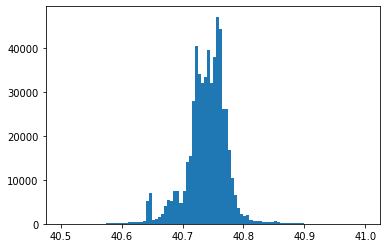

In [50]:
hist(data['Lat'], bins=100, range = (40.5, 41))
;

''

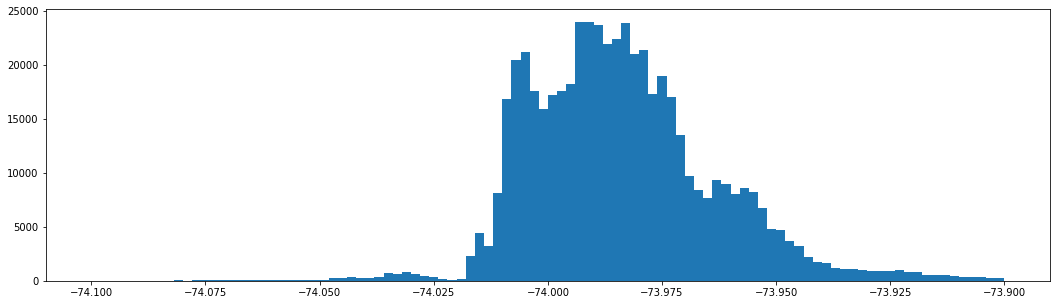

In [72]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9))
plt.rc('figure',figsize=(18,5))
;

''

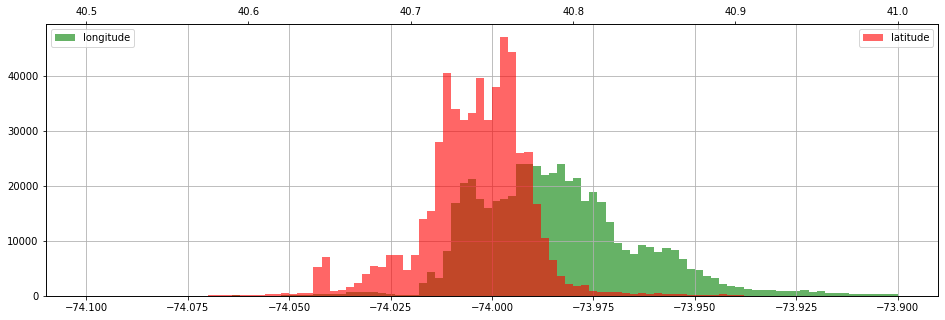

In [77]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.6, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.6, label = 'latitude')
legend(loc='best')
plt.rc('figure',figsize=(18,5))
;

(40.7, 41)

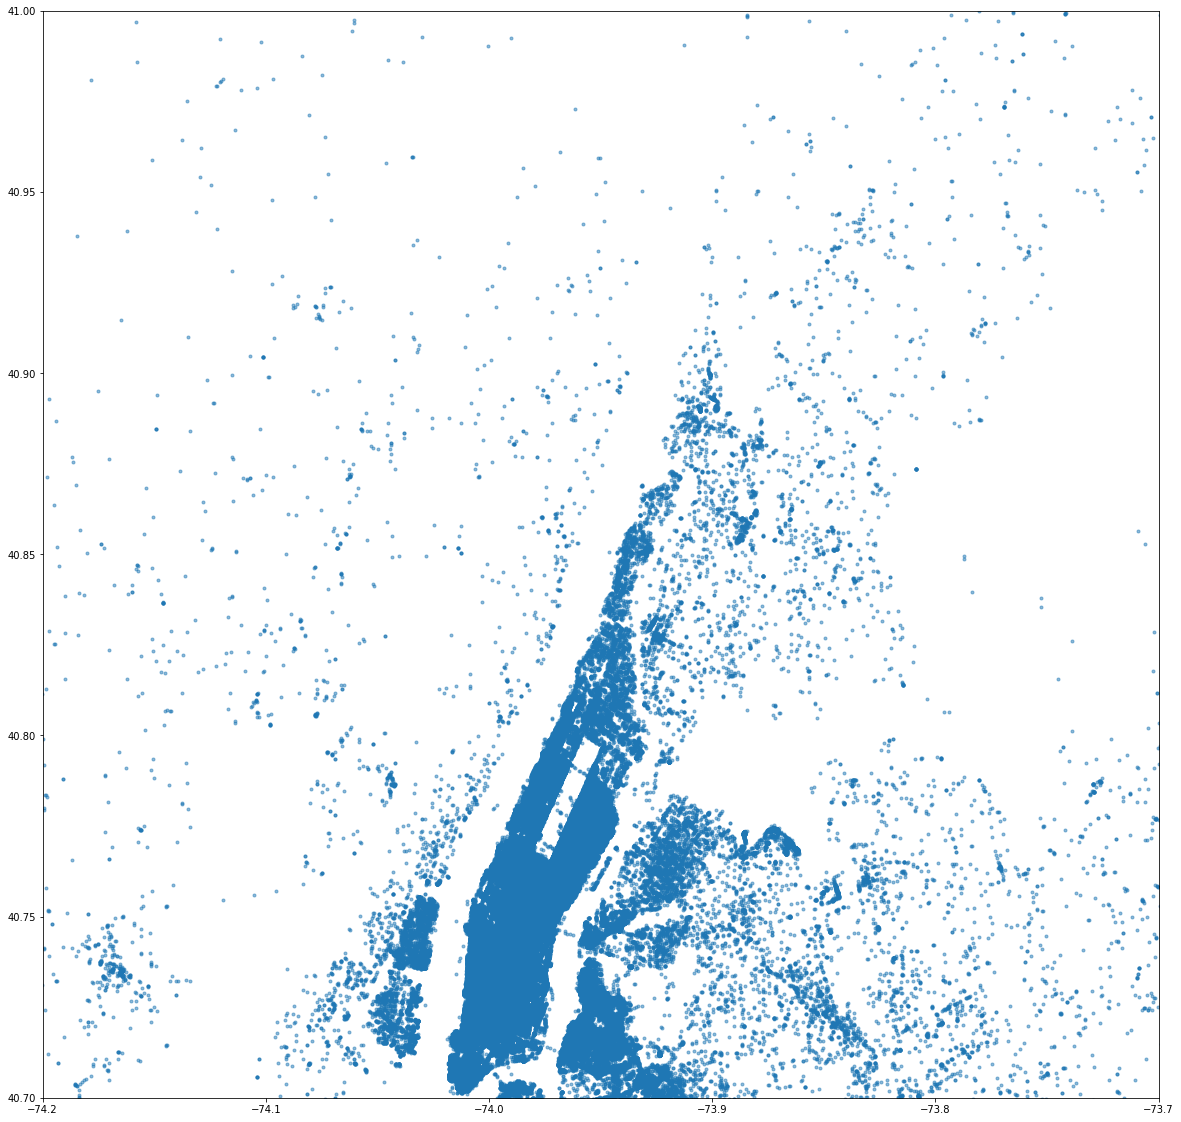

In [85]:
figure(figsize=[20,20])
plot(data['Lon'], data['Lat'], '.', alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)